In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
inDir='../../input'
outDir='../../output'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE=0.2

In [3]:
data_df=pd.read_csv("breast_cancer_mod.csv")

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


<BarContainer object of 2 artists>

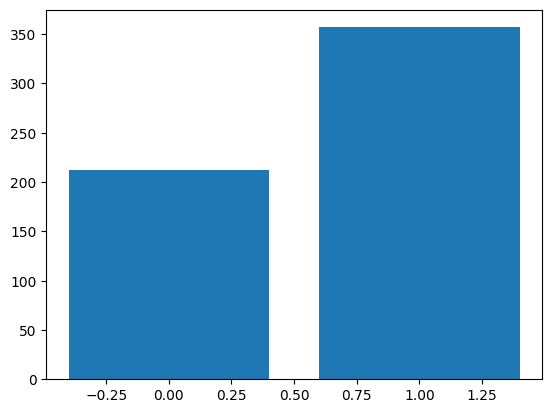

In [6]:
fig,ax=plt.subplots()
ax.bar(data_df.target.value_counts().index,data_df.target.value_counts().values)

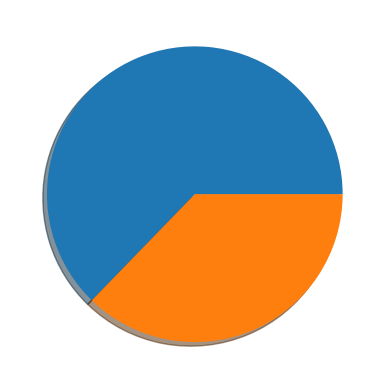

In [7]:
fig,ax=plt.subplots()
ax.pie(data_df.target.value_counts(),shadow=True);

In [8]:
features_df=data_df.drop('target',axis=1)
labels_df=data_df['target']
features_df.shape, labels_df.shape

((569, 30), (569,))

In [9]:
X_train,X_test,y_train,y_test=train_test_split(features_df,
                                               labels_df,
                                               test_size=TEST_SIZE,
                                               random_state=RANDOM_STATE,
                                               stratify=labels_df)

#How does it look
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((455, 30), (114, 30), (455,), (114,))

In [10]:
X_train['total']=X_train.astype(np.int64).sum(axis =1)
X_test['total']=X_test.astype(np.int64).sum(axis =1)

X_train['target'] = y_train
X_test['target'] = y_test

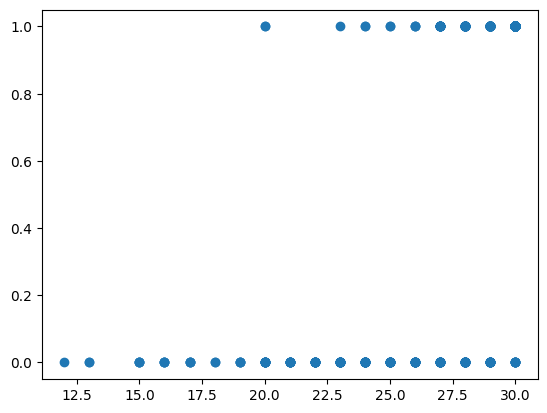

In [11]:
plt.scatter(X_train['total'],X_train['target']);

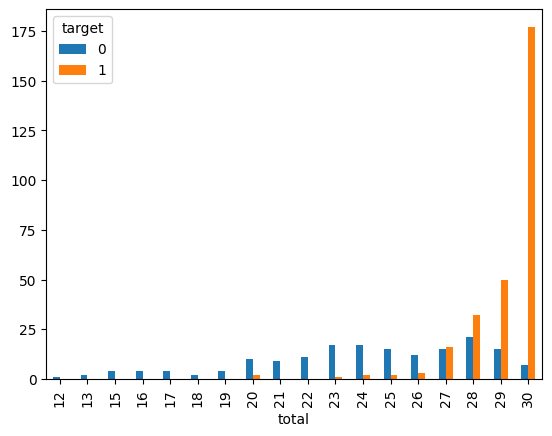

In [12]:
tmp_df=X_train.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns=['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar');

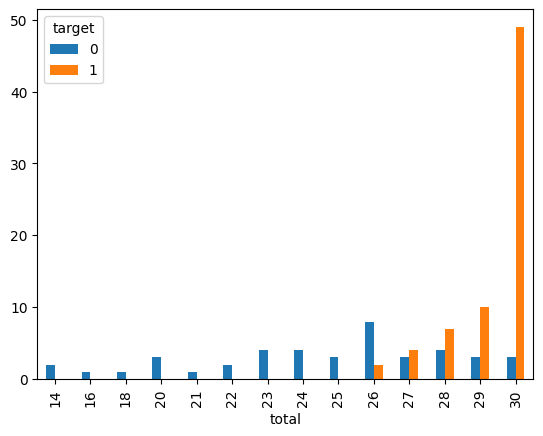

In [13]:
tmp_df=X_test.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns=['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar');

In [14]:
accuracy={}

#loop over all the columns

for b in range(X_train.shape[1]-1):
    X_train['pred']=X_train['total']>=b
    accuracy[b] = accuracy_score(X_train['pred'],X_train['target'])

accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473}

In [15]:
best_b = max(accuracy, key= accuracy.get)
best_b

27

In [16]:
X_test['pred']=x_test['total'] >= best_b
accuracy_score

NameError: name 'x_test' is not defined